In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
dataset_training = pd.read_csv('train.csv')
dataset_testing = pd.read_csv('test.csv')

In [169]:
dataset_training.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [170]:
dataset_testing.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [171]:
dataset_training.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [172]:
dataset_testing.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [173]:
dataset_training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [174]:
dataset_training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [175]:
dataset_testing.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [176]:
#outlier detection
from collections import Counter
def outlier_detection(df, n, features):
    outlier_indices = []
    
    for col in features:
        #1st quartile
        Q1 = np.percentile(df[col], 25)
        
        #3rd quartile
        Q3 = np.percentile(df[col], 75)
        
        #interquartile range
        IQR = Q3 - Q1
        
        #outlier ste
        outlier_step = 1.5*IQR
        
        #outliers_list_index
        outliers_list_index = df[(df[col]< Q1-outlier_step) | (df[col]> Q3+outlier_step)].index
        
        #outlier indices
        outlier_indices.extend(outliers_list_index)
        
    outlier_indices = Counter(outlier_indices)
        
    #select observation containing more than 2 outliers
    multiple_outliers = list( k for k,v in outlier_indices.items() if v>n)
        
    return multiple_outliers

outliers_to_drop = outlier_detection(dataset_training, 2, ['Age','SibSp', 'Parch', 'Fare'])
        
    

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


In [177]:
#looking for outliers
dataset_training.loc[outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


we have 10 outliers here. PassengerId 28,89,342 have high Fare. The other 7 have high SibSp

In [0]:
dataset_training = dataset_training.drop(outliers_to_drop, axis=0).reset_index(drop=True)

In [179]:
dataset_training.shape

(881, 12)

In [0]:
#Joining the train and test dataset
dataset = pd.concat(objs=[dataset_training, dataset_testing], axis =0).reset_index(drop=True)

In [181]:
dataset.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [182]:
dataset.shape

(1299, 12)

In [183]:
dataset.isnull().sum().sort_values(ascending=False)

Cabin          1007
Survived        418
Age             256
Embarked          2
Fare              1
Ticket            0
SibSp             0
Sex               0
Pclass            0
PassengerId       0
Parch             0
Name              0
dtype: int64

In [184]:
dataset_testing.shape

(418, 11)

We can clearly see that Survived has 418 missing values because while concatenating both train and test set, the test doesn't have survived column and it is replaced by NaN

In [185]:
dataset.corr()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Age,1.000000,0.189775,-0.148784,0.026685,-0.411777,-0.242127,-0.076867
Fare,0.189775,1.000000,0.202952,0.048126,-0.562287,0.131820,0.264613
Parch,-0.148784,0.202952,1.000000,0.019635,0.016823,0.350474,0.092819
PassengerId,0.026685,0.048126,0.019635,1.000000,-0.041372,-0.035835,-0.003089
Pclass,-0.411777,-0.562287,0.016823,-0.041372,1.000000,0.044041,-0.334097
SibSp,-0.242127,0.131820,0.350474,-0.035835,0.044041,1.000000,0.003330
Survived,-0.076867,0.264613,0.092819,-0.003089,-0.334097,0.003330,1.000000


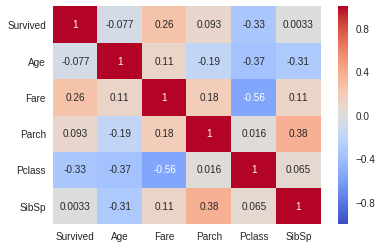

In [186]:
sns.heatmap(dataset_training[['Survived', 'Age', 'Fare', 'Parch', 'Pclass', 'SibSp']].corr(), cmap='coolwarm', annot=True)

From the above plot we see that Fare has the high correlation with the survival probability

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


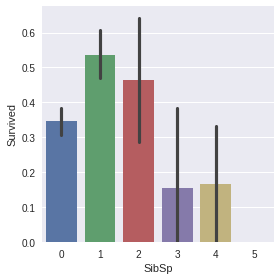

In [187]:
#univariate analysis
sns.factorplot(x='SibSp', y= 'Survived', data=dataset_training, kind='bar')

It seems that chance of survived is someone who has less Siblings

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


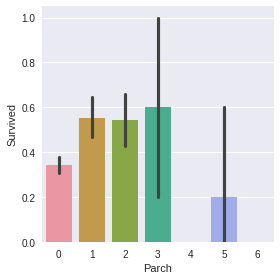

In [188]:
sns.factorplot(x='Parch', y='Survived', data=dataset_training, kind='bar')

It seems that less family size has high chance of survival

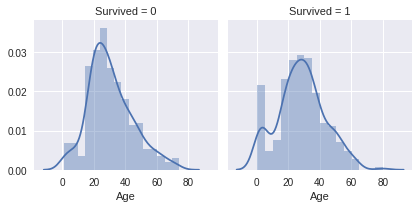

In [189]:
#AGE
%matplotlib inline
g = sns.FacetGrid(data=dataset_training, col='Survived')
g = g.map(sns.distplot, 'Age')

In [190]:
dataset['Fare'].isnull().sum()

1

Since Fare is missing only one so we can use median to fill that one

In [0]:
dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())

In [192]:
dataset['Fare'].isnull().sum()

0

That one NaN value in Fare gets filled

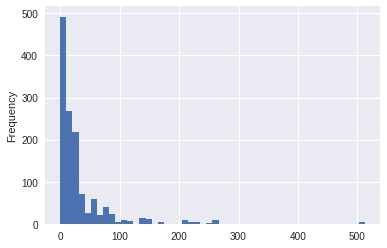

In [193]:
#Univariate analysis for Fare
dataset['Fare'].plot('hist', bins=50)

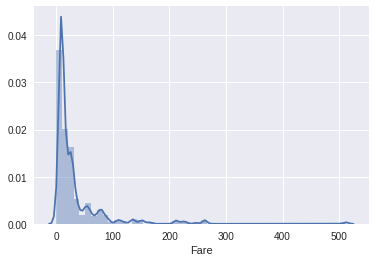

In [194]:
sns.distplot(dataset['Fare'])

from the above plot we can see the distribution of fare plot and it is skewed.

In [0]:
#trying log transformation
dataset['Fare'] = dataset['Fare'].map(lambda i: np.log(i) if i>0 else 0)

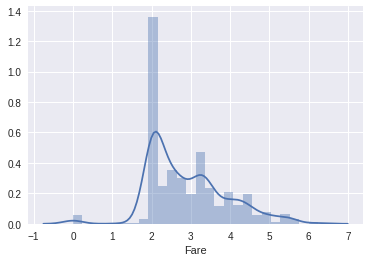

In [196]:
sns.distplot(dataset['Fare'])

Now we can see that the Fare data is normally distributed when compared to without log transformation

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


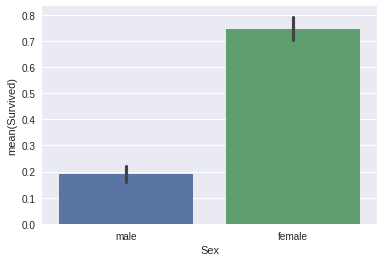

In [197]:
#Categorical variables
sns.barplot(x='Sex', y='Survived', data=dataset_training)

We can see that the Female survived more than Male

In [198]:
dataset_training[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


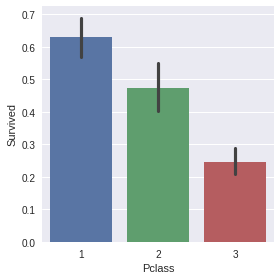

In [199]:
sns.factorplot(x='Pclass', y='Survived',data=dataset_training, kind='bar')

It shows that the Pclass 1 has high chances of survival when compared to lower class

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


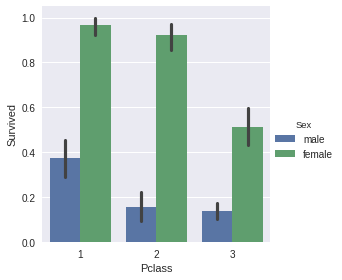

In [200]:
sns.factorplot(x='Pclass', y='Survived',hue= 'Sex',data=dataset_training, kind='bar')

Here also we can see that chances of survival for women is high.

In [201]:
#Embarked missing

dataset['Embarked'].isnull().sum()

2

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


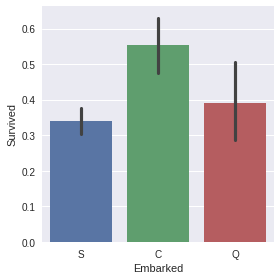

In [202]:
sns.factorplot(x='Embarked', y='Survived', data=dataset, kind='bar')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


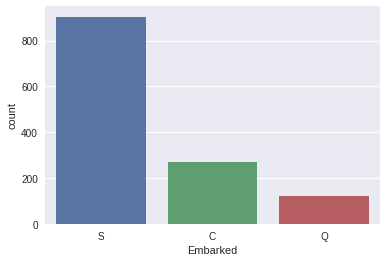

In [203]:
sns.countplot(x='Embarked', data=dataset)

We can see that the most of the people are from S but the probability of surviving in C is more which means the people who are from C is more likely to survived.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


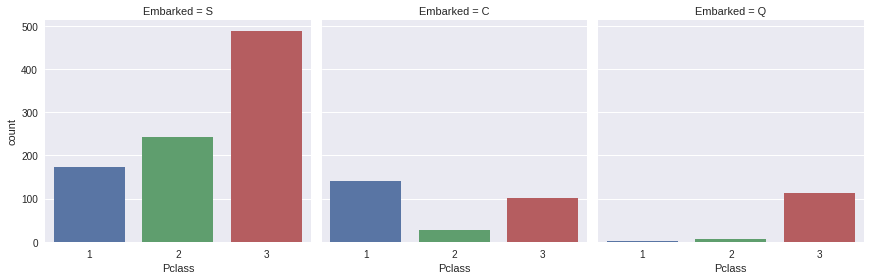

In [204]:
sns.factorplot('Pclass', col='Embarked', data=dataset, kind='count')

This plot shows that more people are from Embarked 'S', but the previous plot shows that most people survived are from Embarked C. 

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:482: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data[hue_mask])


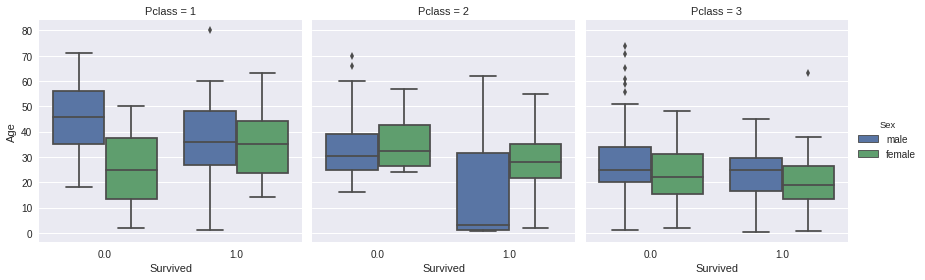

In [205]:
#Age
sns.factorplot(y='Age', x='Survived', hue='Sex', data=dataset, col='Pclass', kind='box')

from the above plot we can see that the in class 1 male aged between 28 to 52, female aged between 25 to 45 are able to survived.
In class 2, male aged between 3 to 28 and female between 25 to 35 are able to survived.
In class 3, male aged between 20 to 33 and female between 15 to 35 are able to survived.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


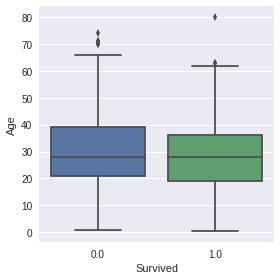

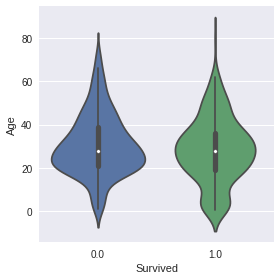

In [206]:
sns.factorplot(x='Survived', y='Age', data=dataset, kind='box')
sns.factorplot(x='Survived', y='Age', data=dataset, kind='violin')

we can see that the survived and non survived has same median values

In [0]:
dataset['Age'].fillna(dataset['Age'].median(), inplace=True)

In [208]:
dataset.isnull().sum()

Age               0
Cabin          1007
Embarked          2
Fare              0
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [209]:
#Cabin
dataset['Cabin'][dataset['Cabin'].notnull()].head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

Since too many values missing in Cabin i am going to drop this column from the dataset

In [0]:
dataset.drop(labels=['Cabin'], axis=1, inplace=True)

In [211]:
dataset.isnull().sum()

Age              0
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
Ticket           0
dtype: int64

In [0]:
dataset = pd.get_dummies(data=dataset, columns=['Embarked'], prefix='Em')

the name feature in the dataset doesn't going to give more information about survival. so drop the column of name as well

In [0]:
dataset.drop(labels=['Name'], axis=1, inplace=True)

In [214]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S
0,22.0,1.981001,0,1,3,male,1,0.0,A/5 21171,0,0,1
1,38.0,4.266662,0,2,1,female,1,1.0,PC 17599,1,0,0
2,26.0,2.070022,0,3,3,female,0,1.0,STON/O2. 3101282,0,0,1
3,35.0,3.972177,0,4,1,female,1,1.0,113803,0,0,1
4,35.0,2.085672,0,5,3,male,0,0.0,373450,0,0,1


In [0]:
#Sex
dataset = pd.get_dummies(data=dataset, columns=['Sex'], prefix='Sex')

In [0]:
#dropping dummy variable
dataset.drop(labels=['Sex_female'], axis=1, inplace=True)

In [217]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1


We can imagine that large families will have more difficulties to evacuate, looking for theirs sisters/brothers/parents during the evacuation. So, i choosed to create a "Fsize" (family size) feature which is the sum of SibSp , Parch and 1 (including the passenger).

In [0]:
#Family size 
dataset['Fsize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [219]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male,Fsize
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1,2
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0,2
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0,1
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0,2
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1,1


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


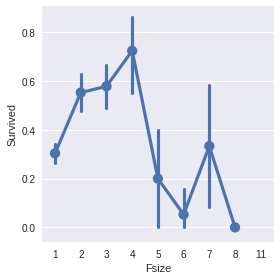

In [220]:
sns.factorplot(x='Fsize', y='Survived',data=dataset)

We can see that the higher the family size less chance to survive

In [0]:
#create of new feature of family size
dataset['Single'] = dataset['Fsize'].map(lambda s:1 if s==1 else 0)
dataset['SmallF'] = dataset['Fsize'].map(lambda s:1 if s==2 else 0)
dataset['MediumF']= dataset['Fsize'].map(lambda s:1 if 3<= s <= 4 else 0)
dataset['LargeF'] = dataset['Fsize'].map(lambda s:1 if s>=5 else 0 )

In [222]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Ticket,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
0,22.0,1.981001,0,1,3,1,0.0,A/5 21171,0,0,1,1,2,0,1,0,0
1,38.0,4.266662,0,2,1,1,1.0,PC 17599,1,0,0,0,2,0,1,0,0
2,26.0,2.070022,0,3,3,0,1.0,STON/O2. 3101282,0,0,1,0,1,1,0,0,0
3,35.0,3.972177,0,4,1,1,1.0,113803,0,0,1,0,2,0,1,0,0
4,35.0,2.085672,0,5,3,0,0.0,373450,0,0,1,1,1,1,0,0,0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


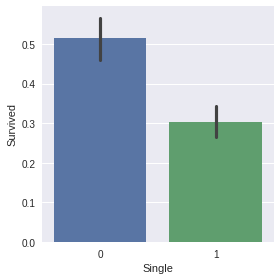

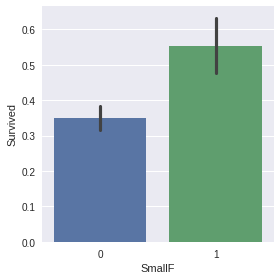

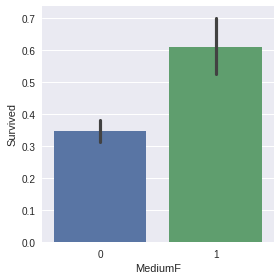

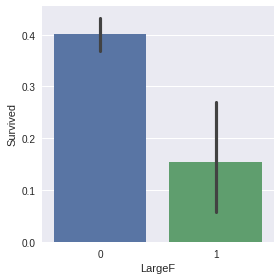

In [223]:
sns.factorplot(x='Single', y='Survived', data=dataset, kind='bar')
sns.factorplot(x='SmallF', y='Survived', data=dataset, kind='bar')
sns.factorplot(x='MediumF', y='Survived', data=dataset, kind='bar')
sns.factorplot(x='LargeF', y='Survived', data=dataset, kind='bar')


from this graph we can see that medium and small family size has high chance of survival

In [0]:
dataset.drop(labels=['Ticket'], axis=1, inplace=True)

In [225]:
dataset.head()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
0,22.0,1.981001,0,1,3,1,0.0,0,0,1,1,2,0,1,0,0
1,38.0,4.266662,0,2,1,1,1.0,1,0,0,0,2,0,1,0,0
2,26.0,2.070022,0,3,3,0,1.0,0,0,1,0,1,1,0,0,0
3,35.0,3.972177,0,4,1,1,1.0,0,0,1,0,2,0,1,0,0
4,35.0,2.085672,0,5,3,0,0.0,0,0,1,1,1,1,0,0,0


In [0]:
dataset.drop(labels=['PassengerId'], axis=1, inplace=True)

In [227]:
train = dataset[:len(dataset_training)]
train.shape

(881, 15)

In [228]:
test = dataset[len(dataset_training):]
test.shape

(418, 15)

In [229]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Survived,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
881,34.5,2.057860,0,3,0,NaN,0,1,0,1,1,1,0,0,0
882,47.0,1.945910,0,3,1,NaN,0,0,1,0,2,0,1,0,0
883,62.0,2.270836,0,2,0,NaN,0,1,0,1,1,1,0,0,0
884,27.0,2.159003,0,3,0,NaN,0,0,1,1,1,1,0,0,0
885,22.0,2.508582,1,3,1,NaN,0,0,1,0,3,0,0,1,0


In [230]:
test.drop(labels=['Survived'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [231]:
test.head()

,Age,Fare,Parch,Pclass,SibSp,Em_C,Em_Q,Em_S,Sex_male,Fsize,Single,SmallF,MediumF,LargeF
881,34.5,2.057860,0,3,0,0,1,0,1,1,1,0,0,0
882,47.0,1.945910,0,3,1,0,0,1,0,2,0,1,0,0
883,62.0,2.270836,0,2,0,0,1,0,1,1,1,0,0,0
884,27.0,2.159003,0,3,0,0,0,1,1,1,1,0,0,0
885,22.0,2.508582,1,3,1,0,0,1,0,3,0,0,1,0


In [0]:
X_test = test

In [233]:
train['Survived'] = train['Survived'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [0]:
y_train = train['Survived']

In [0]:
X_train = train.drop(labels=['Survived'], axis=1)

In [236]:
X_train.shape

(881, 14)

In [0]:
#preprocessing
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

# Neural Networks using Keras

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

In [0]:
def build_classifier(optimizer='adam', kernel_initializer='uniform'):
    classifier = Sequential()
    
    #input layer and first hidden layer
    classifier.add(Dense(units= 8,kernel_initializer=kernel_initializer, activation='relu' , input_dim=14))
    
    #second hidden layer
    classifier.add(Dense(units=8, kernel_initializer=kernel_initializer, activation='relu'))
    
    #third hidden layer
    classifier.add(Dense(units=8, kernel_initializer=kernel_initializer, activation='relu'))
    
    #output layer
    classifier.add(Dense(units=1, kernel_initializer=kernel_initializer, activation='sigmoid'))
    
    #compile
    classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    return classifier

classifier_NN = KerasClassifier(build_fn=build_classifier, batch_size=32, epochs=100 )

In [94]:
classifier_NN.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
881/881 [==============================] - 8s 9ms/step - loss: 0.6921 - acc: 0.5891
Epoch 2/100
881/881 [==============================] - 0s 282us/step - loss: 0.6890 - acc: 0.6141
Epoch 3/100
881/881 [==============================] - 0s 294us/step - loss: 0.6846 - acc: 0.6141
Epoch 4/100
881/881 [==============================] - 0s 293us/step - loss: 0.6752 - acc: 0.6141
Epoch 5/100
881/881 [==============================] - 0s 280us/step - loss: 0.6550 - acc: 0.6141
Epoch 6/100
881/881 [==============================] - 0s 276us/step - loss: 0.6192 - acc: 0.6356
Epoch 7/100
881/881 [==============================] - 0s 277us/step - loss: 0.5690 - acc: 0.8002
Epoch 8/100
881/881 [==============================] - 0s 278us/step - loss: 0.5186 - acc: 0.8138
Epoch 9/100
881/881 [==============================] - 0s 301us/step - loss: 0.4818 - acc: 0.8070
Epoch 10/100
881/881 [==============================] - 0s 276us/step - loss: 0.4582 - acc: 0.8138
Epoch 11/100
881/881 

# Hyper Parameter Tuning

In [0]:
parameters = [
    {
        'batch_size' : [32, 64],
        'epochs' : [100, 300],
        'optimizer' : ['adam', 'rmsprop'],
        'kernel_initializer' : ['uniform', 'normal']
    }
]

In [89]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=classifier_NN, param_grid=parameters, cv=2, scoring='accuracy')
grid_search = grid_search.fit(X_train, y_train)

Epoch 1/100
440/440 [==============================] - 5s 12ms/step - loss: 0.6925 - acc: 0.6227
Epoch 2/100
440/440 [==============================] - 0s 268us/step - loss: 0.6908 - acc: 0.6250
Epoch 3/100
440/440 [==============================] - 0s 288us/step - loss: 0.6890 - acc: 0.6250
Epoch 4/100
440/440 [==============================] - 0s 264us/step - loss: 0.6863 - acc: 0.6250
Epoch 5/100
440/440 [==============================] - 0s 268us/step - loss: 0.6821 - acc: 0.6250
Epoch 6/100
440/440 [==============================] - 0s 269us/step - loss: 0.6752 - acc: 0.6250
Epoch 7/100
440/440 [==============================] - 0s 267us/step - loss: 0.6624 - acc: 0.6250
Epoch 8/100
440/440 [==============================] - 0s 308us/step - loss: 0.6423 - acc: 0.6250
Epoch 9/100
440/440 [==============================] - 0s 317us/step - loss: 0.6134 - acc: 0.6250
Epoch 10/100
440/440 [==============================] - 0s 301us/step - loss: 0.5810 - acc: 0.6250
Epoch 11/100
440/440

In [90]:
print(grid_search.best_score_)

0.7968217934165721


In [91]:
print(grid_search.best_params_)

{'batch_size': 64, 'epochs': 300, 'kernel_initializer': 'normal', 'optimizer': 'adam'}


we can even increase the accuarcy of our model by trying out the different archietecture, different optimization, batch_size, epochs and so on. But taken the computation cost in mind we can stop it here.

# That's the end of the code